In [1]:
import numpy as np
import pandas as pd
import scipy

In [2]:
from ecoevocrm.consumer_resource_system import *
from ecoevocrm.consumer_resource_system import *
import ecoevocrm.utils as utils
import ecoevocrm.viz as viz
import ecoevocrm.coarse_graining as cg
import ecoevocrm.strain_pool

In [3]:
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

----

## Model parameters

### Traits

Set the number of resources in the system:

In [4]:
num_resources = 10

Define type(s) that will be present at the start of the simulation:

Here we define the initial population as consisting of only one type (which is the first type from the list of all possible types)

In [5]:
sigma_allpossible = utils.binary_combinations(num_resources, exclude_all_zeros=True)
sigma_allpossible = sigma_allpossible/sigma_allpossible.sum(axis=1, keepdims=1)

In [6]:
sigma = sigma_allpossible[0]

The initial composition of the population, as encoded in the $\sigma$ matrix, looks like this:

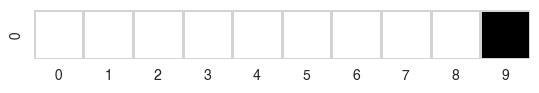

In [7]:
viz.matrix_plot(sigma, linecolor='lightgray', linewidths=1)

Set the initial abundance of each type:
    
(Here we set the initial abundance of each type to 1 individual)

In [8]:
N_init = np.ones(np.atleast_2d(sigma).shape[0])
N_init

array([1.])

### Costs

##### Define cost parameters for types:

Set the baseline cost $\xi$:

In [9]:
xi = 0.1

Set the cost per trait, $\chi_{i}$:

In [10]:
chi = 0.3

Set the trait interaction costs by defining a matrix, $\\J_{ij}$, that encodes the cost for each pair of traits:

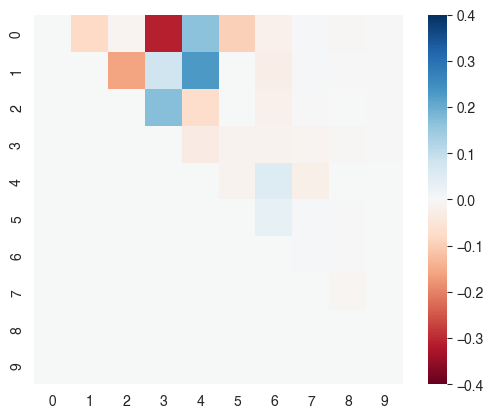

In [11]:
# J = None
J = utils.random_matrix((num_resources, num_resources), 'tikhonov_sigmoid', args={'n_star': 5, 'delta': 1}, triangular=True, diagonal=0, 
                        seed=2)
viz.matrix_plot(J, vmin=-0.4, vmax=0.4)

### Environment

Set the initial amount of each resource:

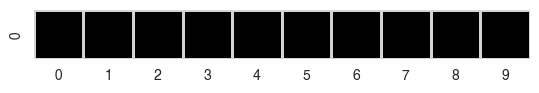

In [12]:
R_init = np.ones(num_resources)
viz.matrix_plot(R_init, vmin=0, vmax=1, cbar=False, linecolor='lightgray', linewidths=1)

Set the influx of each resource:

(Here the last 5 resources have influx, while the first 5 resources have zero influx)

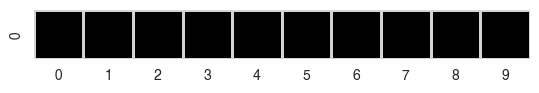

In [13]:
rho = np.ones(num_resources)
viz.matrix_plot(rho, vmin=0, vmax=1, cbar=False, linecolor='lightgray', linewidths=1)

Set the time constant for resource dynamics (will be 1 in practically all cases)

In [14]:
tau = 1

Set the resource dynamics mode used in the simulation. 

(In many basic scenarios we use 'fast resource equilibration' ('fasteq') dynamics)

In [15]:
resource_dynamics_mode='fasteq'

## Simulate model

In [16]:
system = ConsumerResourceSystem(type_set=TypeSet(sigma=sigma, xi=xi, chi=chi, J=J, binarize_traits_J_cost_terms=True, mu=1e-10), 
                                rho=rho, tau=tau,
                                N_init=N_init, R_init=R_init, 
                                resource_dynamics_mode='explicit', 
                                max_time_step=1e3)

In [17]:
T_total = 1e6

In [18]:
system.run(T=T_total)

[ Mutation event occurred at  t=34.7926 1/1*(10)]	
[ Mutation event occurred at  t=35.3179 2/2*(20)]	
[ Mutation event occurred at  t=36.5366 3/3*(30)]	
[ Mutation event occurred at  t=36.7340 4/4*(40)]	
[ Mutation event occurred at  t=36.8798 5/5*(50)]	
[ Mutation event occurred at  t=37.8244 5/5*(50)]	
[ Mutation event occurred at  t=38.5412 5/5*(50)]	
[ Mutation event occurred at  t=38.5950 5/5*(50)]	
[ Mutation event occurred at  t=38.7756 5/5*(50)]	
[ Mutation event occurred at  t=38.9233 5/5*(50)]	
[ Mutation event occurred at  t=39.0847 6/6*(60)]	
[ Mutation event occurred at  t=39.1853 7/7*(70)]	
[ Mutation event occurred at  t=39.2058 7/7*(70)]	
[ Mutation event occurred at  t=39.2498 7/7*(70)]	
[ Mutation event occurred at  t=39.5316 7/7*(70)]	
[ Mutation event occurred at  t=39.9087 7/7*(70)]	
[ Mutation event occurred at  t=40.5041 7/7*(70)]	
[ Mutation event occurred at  t=40.5103 7/7*(70)]	
[ Mutation event occurred at  t=40.8468 7/7*(70)]	
[ Mutation event occurred at  t

ValueError: f(a) and f(b) must have different signs

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(20, 8))
viz.stacked_abundance_plot(system, ax=ax, relative_abundance=False, apply_palette_depth=1, log_x_axis=True, color_seed=1)

In [ ]:
system.biomass

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(20, 8))
viz.resource_plot(system, ax=ax, stacked=False, relative=False, log_x_axis=True, log_y_axis=False)

In [ ]:
viz.matrix_plot(system.extant_type_set.sigma)

---------
---------

----

## Model parameters

### Traits

Set the number of resources in the system:

In [ ]:
num_resources = 10

Define type(s) that will be present at the start of the simulation:

Here we define the initial population as consisting of only one type (which is the first type from the list of all possible types)

In [ ]:
sigma_allpossible = utils.binary_combinations(num_resources, exclude_all_zeros=True)
sigma_allpossible = sigma_allpossible/sigma_allpossible.sum(axis=1, keepdims=1)

In [ ]:
sigma = sigma_allpossible[-117]

The initial composition of the population, as encoded in the $\sigma$ matrix, looks like this:

In [ ]:
viz.matrix_plot(sigma, linecolor='lightgray', linewidths=1, cbar=False)

Set the initial abundance of each type:
    
(Here we set the initial abundance of each type to 1 individual)

In [ ]:
N_init = np.ones(np.atleast_2d(sigma).shape[0])
N_init

### Costs

##### Define cost parameters for types:

Set the baseline cost $\xi$:

In [ ]:
xi = 0.1

Set the cost per trait, $\chi_{i}$:

In [ ]:
chi = 0.3

Set the trait interaction costs by defining a matrix, $\\J_{ij}$, that encodes the cost for each pair of traits:

In [ ]:
# J = None
J = utils.random_matrix((num_resources, num_resources), 'tikhonov_sigmoid', args={'n_star': 5, 'delta': 1}, triangular=True, diagonal=0, 
                        seed=2)
viz.matrix_plot(J, vmin=-0.4, vmax=0.4)

### Environment

Set the initial amount of each resource:

In [ ]:
R_init = np.ones(num_resources)
viz.matrix_plot(R_init, vmin=0, vmax=1, cbar=False, linecolor='lightgray', linewidths=1)

Set the influx of each resource:

(Here the last 5 resources have influx, while the first 5 resources have zero influx)

In [ ]:
rho = np.ones(num_resources)
viz.matrix_plot(rho, vmin=0, vmax=1, cbar=False, linecolor='lightgray', linewidths=1)

Set the time constant for resource dynamics (will be 1 in practically all cases)

In [ ]:
tau = 1

Set the resource dynamics mode used in the simulation. 

(In many basic scenarios we use 'fast resource equilibration' ('fasteq') dynamics)

In [ ]:
resource_dynamics_mode='fasteq'

## Simulate model

In [ ]:
system = ConsumerResourceSystem(type_set=TypeSet(sigma=sigma, xi=xi, chi=chi, J=J, binarize_traits_J_cost_terms=True, mu=1e-10), 
                                rho=rho, tau=tau,
                                N_init=N_init, R_init=R_init, 
                                resource_dynamics_mode='explicit', 
                                max_time_step=1e3)

In [ ]:
T_total = 1e6

In [ ]:
system.run(T=T_total)

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(20, 8))
viz.stacked_abundance_plot(system, ax=ax, relative_abundance=False, apply_palette_depth=1, log_x_axis=True, color_seed=1)

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(20, 5))
viz.resource_plot(system, ax=ax, stacked=False, relative=False, log_x_axis=True, log_y_axis=False)

In [ ]:
viz.matrix_plot(system.extant_type_set.sigma)

---------
---------

In [ ]:
import numpy as np
import pandas as pd
import scipy

In [ ]:
from ecoevocrm.consumer_resource_system import *
from ecoevocrm.consumer_resource_system import *
import ecoevocrm.utils as utils
import ecoevocrm.viz as viz
import ecoevocrm.coarse_graining as cg
import ecoevocrm.strain_pool

In [ ]:
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
def ye_random_matrix(shape, mode, args={}, sparsity=0.0, symmetric=False, triangular=False, diagonal=None, ordered=False, ordering_strength=10, scale_range=None, seed=None):
    if(seed is not None):
        np.random.seed(seed)
    #--------------------------------
    # Generate random values according to one of the following random models:
    #--------------------------------
    if(mode == 'bernoulli'):
        M = np.random.binomial(n=1, p=(args['p'] if 'p' in args else 0.5), size=shape)
    elif(mode == 'binomial'):
        M = np.random.binomial(n=(args['n'] if 'n' in args else 1), p=(args['p'] if 'p' in args else 0.5), size=shape)
    elif(mode == 'uniform'):
        M = np.random.uniform(low=(args['min'] if 'min' in args else 0), high=(args['max'] if 'max' in args else 1), size=shape)
    elif(mode == 'normal'):
        M = np.random.normal(loc=(args['mean'] if 'mean' in args else 0), scale=(args['std'] if 'std' in args else 1), size=shape)
    elif(mode == 'logistic'):
        M = np.random.logistic(loc=(args['mean'] if 'mean' in args else 0), scale=(args['scale'] if 'scale' in args else 1), size=shape)
    elif(mode == 'exponential'):
        M = np.random.exponential(scale=(args['scale'] if 'scale' in args else 1), size=shape)
        M *=  np.random.choice([1, -1], size=shape)
    elif(mode == 'laplace'):
        M = np.random.laplace(loc=(args['mean'] if 'mean' in args else 0), scale=(args['scale'] if 'scale' in args else 1), size=shape)
    elif(mode == 'cauchy'):
        M = scipy.stats.cauchy.rvs(loc=(args['mean'] if 'mean' in args else 0), scale=(args['scale'] if 'scale' in args else 1), size=shape)
    elif(mode == 'exponential_normal'):
        loc   = args['mean'] if 'mean' in args else 0
        scale = args['scale'] if 'scale' in args else 1
        rate  = args['shape'] if 'shape' in args else args['rate'] if 'rate' in args else 1
        M = scipy.stats.exponnorm.rvs(K=1/(scale*rate), loc=loc, scale=rate, size=shape)
    elif(mode == 'gamma'):
        mean     = (args['mean'] if 'mean' in args else 0)
        coeffvar = (args['coeffvar'] if 'coeffvar' in args else args['cv'] if 'cv' in args else 0)
        scale    = mean * coeffvar ** 2
        shape    = mean / scale
        np.random.gamma(scale=scale, shape=shape, size=shape)
    elif(mode == 'tikhonov_sigmoid'):
        J_0    = args['J_0'] if 'J_0' in args else 0.2
        n_star = args['n_star'] if 'n_star' in args else 10
        delta  = args['delta'] if 'delta' in args else 3
        M = np.zeros(shape=shape)
        for i, j in np.ndindex(M.shape):
            if(i >= j):
                continue
            M[i,j] = np.random.normal( loc=0, scale=J_0*(1/(1 + np.exp((max(i+1, j+1) - n_star)/delta))) )   # +1s because i,j indices start at 0
    elif(mode == 'tikhonov_sigmoid_ordered'):
        J_0    = args['J_0'] if 'J_0' in args else 0.4
        n_star = args['n_star'] if 'n_star' in args else 10
        delta  = args['delta'] if 'delta' in args else 5
        M = np.zeros(shape=shape)
        vals   = [np.random.choice([1, -1]) * J_0/(1 + np.exp((i - n_star)/delta)) for i in range(int((M.shape[0]*M.shape[0]-M.shape[0])/2))]
        c = 0
        for j in range(M.shape[1]):
            for i in range(M.shape[0]):
                if(j <= i):
                    continue
                else:
                    M[i,j] = vals[c] * (1 if (j+i)%2==0 else -1)
                    c += 1
    elif(mode == 'choice'):
        M = np.random.choice(a=args['a'], size=shape)
    else:
        error(f"Error in random_matrix(): generator mode '{mode}' is not recognized.")
    #--------------------------------
    # Apply specified sparsity:
    # num_ = range(len(np.triu_indices(M.shape[0], k=0 if diagonal is not None else 1)[0])) if triangular else M.shape[1]*M.shape[0]
    # zeroed_indices = np.random.choice(, replace=False, size=int(M.shape[1]*M.shape[0]*sparsity))        
    if(triangular):
        active_indices   = np.triu_indices(M.shape[0], k=0 if diagonal is not None and diagonal != 0 else 1)
        zeroed_indices_i = np.random.choice(range(len(active_indices[0])), replace=False, size=int(len(active_indices[0])*sparsity))
        zeroed_indices   = (active_indices[0][zeroed_indices_i], active_indices[1][zeroed_indices_i])
        M[zeroed_indices] = 0
    else:
        zeroed_indices = np.random.choice(M.shape[1]*M.shape[0], replace=False, size=int(M.shape[1]*M.shape[0]*sparsity))
        M[np.unravel_index(zeroed_indices, M.shape)] = 0 
    #--------------------------------
    # Make symmetric, if applicable:
    if(symmetric):
        if(shape[0] != shape[1]):
            error(f"Error in random_matrix(): shape {shape} is not square and cannot be made symmetric.")
        M = np.tril(M) + np.triu(M.T, 1)
    #--------------------------------
    # Make triangular, if applicable:
    if(triangular):
        if(shape[0] != shape[1]):
            error(f"Error in random_matrix(): shape {shape} is not square and cannot be made triangular.")
        M *= 1 - np.tri(*M.shape, k=-1, dtype=np.bool)
    #--------------------------------
    # Set diagonal, if applicable:
    if(diagonal is not None):
        np.fill_diagonal(M, diagonal)
    #--------------------------------
    # Make ordered, if applicable:
    if(ordered):
        vals = np.array(sorted(M[M!=0], key=abs, reverse=True))

        def weighted_shuffle(items, weights):
            order = sorted(range(len(items)), key=lambda i: np.random.uniform(low=0, high=1) ** (1.0 / weights[i]))
            return [items[i] for i in order]

        items=vals
        weights=((np.abs(vals)**(ordering_strength))/np.sum(np.abs(vals)**(ordering_strength)))[::-1]
        
        vals = weighted_shuffle(items=items, weights=weights)

        c = 0
        for j in range(M.shape[1]):
            for i in range(M.shape[0]):
                if(M[i,j] != 0):
                    M[i,j] = vals[c]
                    c += 1


    #--------------------------------
    # Scale values to desired range, if applicable:
    if(scale_range is not None):
        M[M != 0] = np.interp(M[M != 0], (M[M != 0].min(), M[M != 0].max()), (scale_range[0], scale_range[1]))
    #--------------------------------
    return M

In [ ]:
fig, ax = plt.subplots(1, 3, figsize=(20, 5))

J_0     = 0.2
J_NSTAR = 5
J_DELTA = 1
J = ye_random_matrix((10, 10), 'tikhonov_sigmoid', args={'J_0': J_0, 'n_star': J_NSTAR, 'delta': J_DELTA}, triangular=True, diagonal=0, seed=2)

viz.matrix_plot(J, ax=ax[0], vmin=-0.4, vmax=0.4, cbar=False, square=True)
ax[1].axvline(J_NSTAR, c='#ccc', ls='--')
ax[1].plot(range(len(J[J!=0])), np.sort(np.abs(J[J!=0]))[::-1], label="$n_{\\ast}$ = "+str(J_NSTAR)) 
# ax[1].set_ylim((0, 0.5))

ax[2].hist(J[J!=0], bins=len(J[J!=0]), edgecolor='w')

print("mean", J.mean(), "; stdev", J.std(), "; max", J.max())


In [ ]:
fig, ax = plt.subplots(1, 3, figsize=(20, 5))

J_0     = 0.2
J_NSTAR = 6
J_DELTA = 1
J = ye_random_matrix((12, 12), 'tikhonov_sigmoid', args={'J_0': J_0, 'n_star': J_NSTAR, 'delta': J_DELTA}, triangular=True, diagonal=0, seed=2, ordered=True, ordering_strength=20)

viz.matrix_plot(J, ax=ax[0], vmin=-0.4, vmax=0.4, cbar=False, square=True)
ax[1].axvline(J_NSTAR, c='#ccc', ls='--')
ax[1].plot(range(len(J[J!=0])), np.sort(np.abs(J[J!=0]))[::-1], label="$n_{\\ast}$ = "+str(J_NSTAR)) 
# ax[1].set_ylim((0, 0.5))

ax[2].hist(J[J!=0], bins=len(J[J!=0]), edgecolor='w')

print("mean", J.mean(), "; stdev", J.std(), "; max", J.max())


In [ ]:
fig, ax = plt.subplots(1, 3, figsize=(20, 5))

J_0     = 0.4
J_NSTAR = 12
J_DELTA = 4
J = ye_random_matrix((12, 12), 'tikhonov_sigmoid_ordered', args={'J_0': J_0, 'n_star': J_NSTAR, 'delta': J_DELTA}, triangular=True, diagonal=0, seed=2)

viz.matrix_plot(J, ax=ax[0], vmin=-0.4, vmax=0.4, cbar=False, square=True)
ax[1].axvline(J_NSTAR, c='#ccc', ls='--')
ax[1].plot(range(len(J[J!=0])), np.sort(np.abs(J[J!=0]))[::-1], label="$n_{\\ast}$ = "+str(J_NSTAR)) 
# ax[1].set_ylim((0, 0.5))

ax[2].hist(J[J!=0], bins=len(J[J!=0]), edgecolor='w')

print("mean", J.mean(), "; stdev", J.std(), "; max", J.max())


In [ ]:
fig, ax = plt.subplots(1, 3, figsize=(20, 5))

J_0     = 0.4
J_NSTAR = 12
J_DELTA = 4
J = ye_random_matrix((12, 12), 'tikhonov_sigmoid_ordered', args={'J_0': J_0, 'n_star': J_NSTAR, 'delta': J_DELTA}, triangular=True, diagonal=0, seed=2, ordered=True, ordering_strength=10)

viz.matrix_plot(J, ax=ax[0], vmin=-0.4, vmax=0.4, cbar=False, square=True)
ax[1].axvline(J_NSTAR, c='#ccc', ls='--')
ax[1].plot(range(len(J[J!=0])), np.sort(np.abs(J[J!=0]))[::-1], label="$n_{\\ast}$ = "+str(J_NSTAR)) 
# ax[1].set_ylim((0, 0.5))

ax[2].hist(J[J!=0], bins=len(J[J!=0]), edgecolor='w')

print("mean", J.mean(), "; stdev", J.std(), "; max", J.max())


In [ ]:
import networkx as nx

In [ ]:
fig, ax = plt.subplots(1, 3, figsize=(15, 5))

viz.matrix_plot(J, ax=ax[0], vmin=-0.4, vmax=0.4, cbar=False, square=True)

Jadj = J.copy()
# Jadj[Jadj > 0] = 0  # only consider network of antagonistic interactions
adj_thresh = 0.05
Jadj[np.abs(Jadj) < adj_thresh] = 0
Jadj[Jadj != 0] = 1
viz.matrix_plot(Jadj, ax=ax[1], cbar=False, square=True)

print(scipy.sparse.csgraph.connected_components(Jadj))

G2 = nx.from_scipy_sparse_matrix(scipy.sparse.csr_matrix(Jadj))
nx.draw_networkx(G2, ax=ax[2], with_labels=True)

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(15, 5))

J_NSTAR = 5

J = utils.random_matrix((12, 12), 'exponential', args={'mean': 0, 'scale': 0.1}, triangular=True, diagonal=0, seed=22, ordered=True)

viz.matrix_plot(J, ax=ax[0], vmin=-0.4, vmax=0.4, cbar=False, square=True)
ax[1].plot(range(len(J[J!=0])), np.sort(np.abs(J[J!=0]))[::-1], label="$n_{\\ast}$ = "+str(J_NSTAR)) 
ax[1].set_ylim((0, 0.5))

print("mean", J.mean(), "; stdev", J.std())

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(15, 5))

J_NSTAR = 5

J = utils.random_matrix((12, 12), 'normal', args={'mean': 0, 'std': 0.1}, triangular=True, diagonal=0, seed=22, ordered=True)

viz.matrix_plot(J, ax=ax[0], vmin=-0.4, vmax=0.4, cbar=False, square=True)
ax[1].plot(range(len(J[J!=0])), np.sort(np.abs(J[J!=0]))[::-1], label="$n_{\\ast}$ = "+str(J_NSTAR)) 
ax[1].set_ylim((0, 0.5))

print("mean", J.mean(), "; stdev", J.std())

In [ ]:
# a = np.random.uniform(low=0, high=10, size=30)
a = np.abs(J[J!=0])
a

In [ ]:
np.random.seed(17)
plt.figure(figsize=(20,6))

step = 2
stop = 12
for w in np.arange(start=0, stop=stop+step, step=step):
    
    p = a**w/np.sum(a**w)
    # print(p, p.sum())
    
    b = np.random.choice(a, p=p, replace=False, size=len(a))

    plt.plot(range(len(b)), b, ls='-', alpha=max(0.05, w/stop))
    plt.scatter(range(len(b)), b, s=10, label=f"w={w}")
    
plt.legend()

In [ ]:
def weighted_shuffle(items, weights):
    order = sorted(range(len(items)), key=lambda i: np.random.uniform(low=0, high=1) ** (1.0 / weights[i]))
    return [items[i] for i in order]

In [ ]:
np.random.seed(17)
plt.figure(figsize=(20,6))

a = sorted(np.abs(J[J!=0]))[::-1]
plt.plot(range(len(a)), a, ls='-', alpha=1, c='k')

step = 0.1
stop = 1.0
# for w in np.arange(start=0, stop=stop+step, step=step):
for w in np.array([0.0, 0.01, 0.02, 0.04, 0.08, 0.16, 0.32, 0.64, 1.28, 2.56, 5.12])[::1]:
    
    print(w)
    
    a = sorted(np.abs(J[J!=0]))[::-1]
    # print(a)
    # print()
    
    p = (a**w)/np.sum(a**w)
    p = p[::-1]
    # print(a**w)
    # print(p)
    
    b = weighted_shuffle(items=a, weights=p)

    plt.plot(range(len(b)), b, ls='-', alpha=min(max(0.05, (w)/stop), 1))
    plt.scatter(range(len(b)), b, s=10, label=f"w={w}")
    
    # break
    
plt.legend()